In [477]:
# Wine Review datasets is available through kaggle
# https://www.kaggle.com/zynicide/wine-reviews

# Getting all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# K Means cluster
from sklearn.cluster import KMeans
# Yellowbrick module
from yellowbrick.cluster import KElbowVisualizer
# adding Silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Reading dataset from local folder

wine = pd.read_csv('winemag-data-130k-v2.csv')

In [68]:
# Looking at the dataset
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [69]:
# Removing not needed column
wine.drop(['Unnamed: 0'],axis=1, inplace=True)

In [71]:
# Getting properties of all the columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [80]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [76]:
sns.set(style='darkgrid')

In [84]:
# Getting only desired variable

wine = wine[['taster_name','variety']]

In [436]:
new_people = wine.pivot_table(index=['variety'],columns=['taster_name'],
                            aggfunc=len,fill_value=0,dropna=True).reset_index()

In [437]:
new_people

taster_name,variety,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
0,Abouriou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1
1,Agiorgitiko,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0
2,Aglianico,1,0,0,0,0,0,0,5,0,178,0,3,0,0,0,0,0,0,6
3,Aidani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Airen,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Zinfandel,0,0,0,0,0,0,0,434,3,0,0,175,0,0,151,0,17,0,800
666,Zlahtina,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
667,Zweigelt,0,2,130,0,0,0,1,0,0,0,0,0,0,0,2,71,3,0,0
668,Çalkarası,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [369]:
new_wine = wine.pivot_table(index=['taster_name'],columns=['variety'],
                            aggfunc=len,fill_value=0,dropna=True).reset_index()

In [370]:
# removing every column where values are just zeros
new_wine = new_wine.loc[:, new_wine.any()]

In [371]:
new_wine.to_csv('new_wine.csv',index=None)
new_wine = pd.read_csv('new_wine.csv',index_col=None)

In [372]:
new_wine.shape

(19, 671)

In [373]:
# getting only two columns
# mostly where at least one row has non zero
new_wine_1 = new_wine[['taster_name','Zweigelt','Zierfandler']]

In [374]:
new_wine_1

,taster_name,Zweigelt,Zierfandler
0,Alexander Peartree,0,0
1,Anna Lee C. Iijima,2,0
2,Anne Krebiehl MW,130,12
3,Carrie Dykes,0,0
4,Christina Pickard,0,0
5,Fiona Adams,0,0
6,Jeff Jenssen,1,0
7,Jim Gordon,0,0
8,Joe Czerwinski,0,0
9,Kerin O’Keefe,0,0


In [376]:
# Start k means clustering for new_wine_1 dataset first
new_wine_1 = new_wine_1.iloc[:,1:]
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(new_wine_1)

In [406]:
# using elbow method to determine optimum number of cluster
distortions = []

K = range(1,20)

for k in K:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(new_wine_1)
    distortions.append(kmeanmodel.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

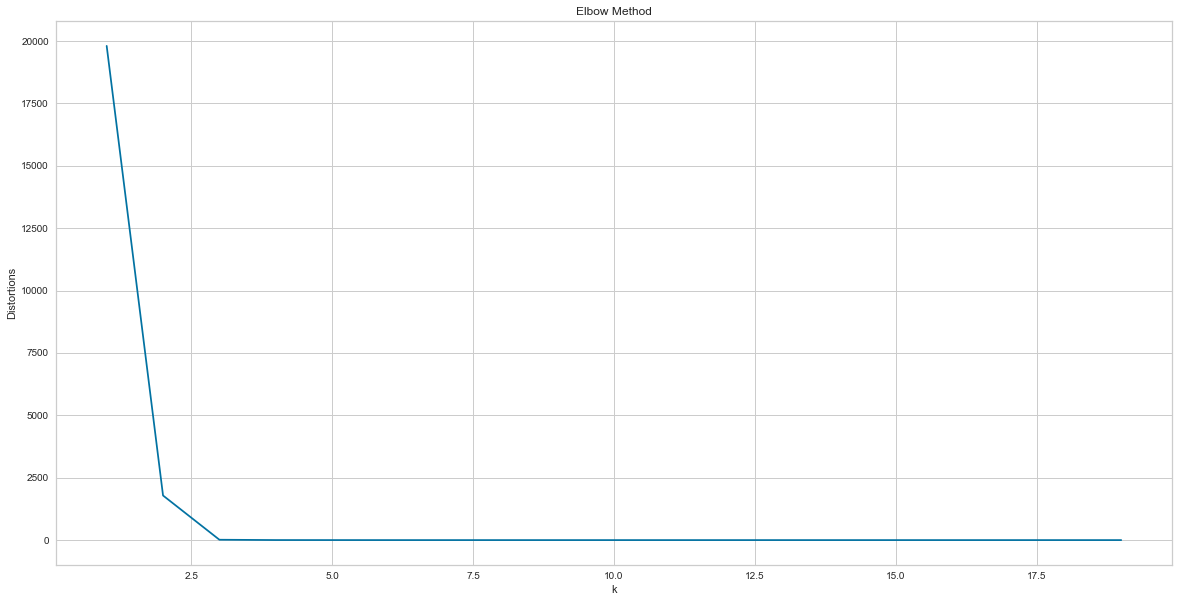

In [421]:
# With 3 cluster only
# We are trying to determine how similar the customers are and not wine

kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(new_wine_1)
new_wine_1['kmeans_predicted'] = y_kmeans3
new_wine_1

,Zweigelt,Zierfandler,kmeans_predicted
0,0,0,0
1,2,0,0
2,130,12,1
3,0,0,0
4,0,0,0
5,0,0,0
6,1,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [423]:
new_wine = new_wine.iloc[:,1:]

In [425]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(new_wine)

Text(0.5, 1.0, 'Elbow Method')

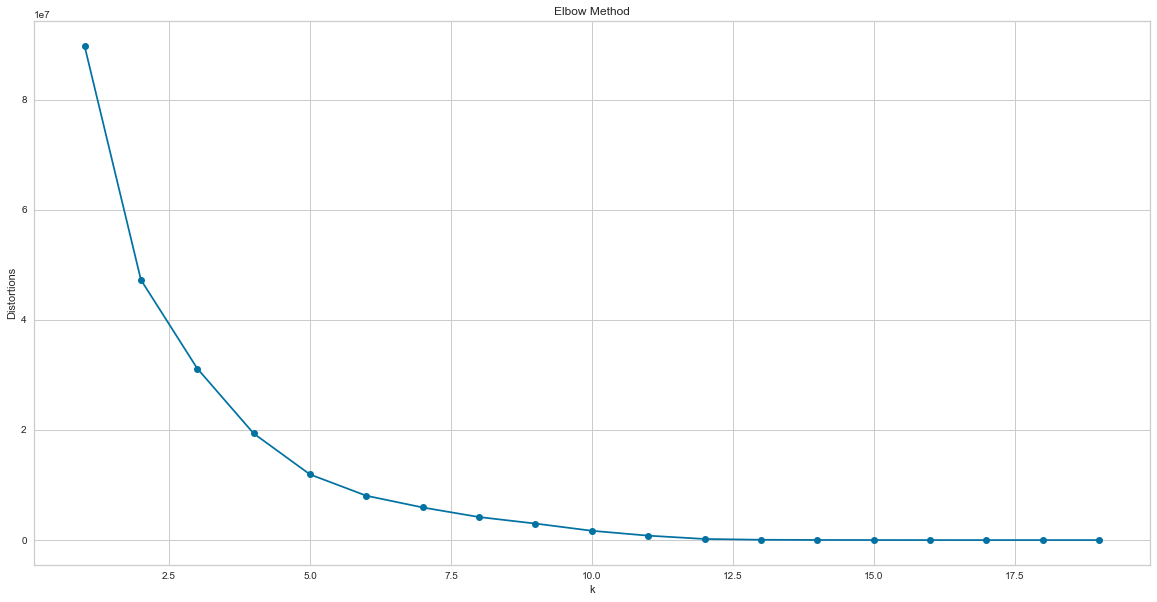

In [434]:
# using elbow method to determine optimum number of cluster
distortions = []

K = range(1,20)

for k in K:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(new_wine)
    distortions.append(kmeanmodel.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(K,distortions,'bx-',marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method')

In [438]:
# With 12 cluster only
# We are trying to determine how similar the customers are and not wine

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(new_wine)
new_wine['kmeans_predicted_5'] = y_kmeans5
new_wine

,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alfrocheiro,...,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka,kmeans_predicted,kmeans_predicted_8,kmeans_predicted_5
0,0,0,1,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,11,4,0
1,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,2,0,0,5,6,0
2,0,0,0,0,0,0,0,0,0,0,...,12,5,0,0,130,0,0,9,4,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,11,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,4,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,4,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,11,4,0
7,0,0,5,0,0,0,0,13,0,0,...,0,0,434,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,10,1,0
9,0,0,178,0,0,16,1,0,2,0,...,0,0,0,0,0,0,0,2,3,3


In [430]:
new_wine['kmeans_predicted'].value_counts()

11    8
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
0     1
Name: kmeans_predicted, dtype: int64

In [433]:
new_wine['kmeans_predicted_8'].value_counts()

4    9
1    4
7    1
6    1
5    1
3    1
2    1
0    1
Name: kmeans_predicted_8, dtype: int64

In [439]:
new_wine['kmeans_predicted_5'].value_counts()

0    13
2     3
4     1
3     1
1     1
Name: kmeans_predicted_5, dtype: int64

In [440]:
# Trying the same with people cluster
# identifying how to segment people in different clusters

In [441]:
new_people

taster_name,variety,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
0,Abouriou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1
1,Agiorgitiko,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0
2,Aglianico,1,0,0,0,0,0,0,5,0,178,0,3,0,0,0,0,0,0,6
3,Aidani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Airen,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Zinfandel,0,0,0,0,0,0,0,434,3,0,0,175,0,0,151,0,17,0,800
666,Zlahtina,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
667,Zweigelt,0,2,130,0,0,0,1,0,0,0,0,0,0,0,2,71,3,0,0
668,Çalkarası,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [447]:
# starting with two people only 
new_people.to_csv('new_people.csv',index=None)
new_people = pd.read_csv('new_people.csv',index_col=None)

In [451]:
new_people_1 = new_people.iloc[:,1:3]

In [456]:
# starting cluster with hyperparameter as 3
kmeans_3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(new_people_1)
new_people_1['y_kmeans3'] = y_kmeans3
new_people_1['y_kmeans3'].value_counts()

0    663
2      6
1      1
Name: y_kmeans3, dtype: int64

In [459]:
new_people_1.head(10)

,Alexander Peartree,Anna Lee C. Iijima,y_kmeans3
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,3,3,0
8,0,0,0
9,0,0,0


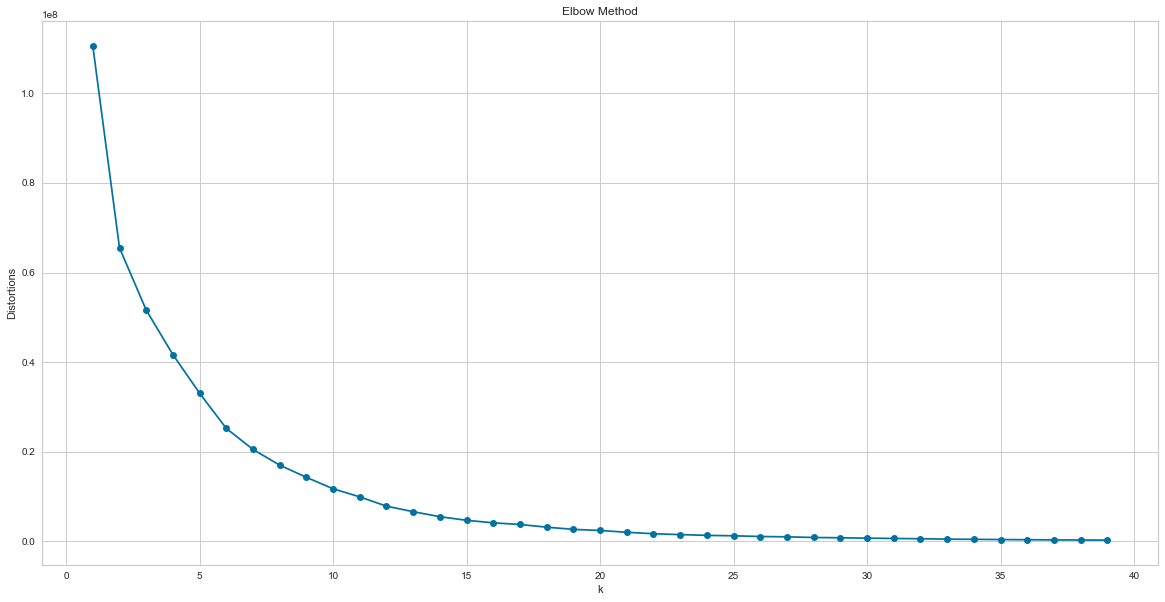

In [466]:
# using elbow chart to idnetify the optimal number of clusters
# using elbow method to determine optimum number of cluster
distortions = []

K = range(1,40)

for k in K:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(new_people.iloc[:,1:])
    distortions.append(kmeanmodel.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(K,distortions,'bx-',marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

In [468]:
# since the value comes down to 15 hence we will select 25 as optimum number of cluster
# this means that we are clustering 15 different kinds of wine and not people

In [469]:
kmeans_15 = KMeans(n_clusters=15)
y_kmeans15 = kmeans_15.fit_predict(new_people.iloc[:,1:])
new_people['y_kmeans15'] = y_kmeans15
new_people['y_kmeans15'].value_counts()

0     639
12      8
9       5
11      4
8       2
6       2
4       2
14      1
13      1
10      1
7       1
5       1
3       1
2       1
1       1
Name: y_kmeans15, dtype: int64

In [470]:
new_people

,variety,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,...,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone,y_kmeans15
0,Abouriou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0
1,Agiorgitiko,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63,0,0
2,Aglianico,1,0,0,0,0,0,0,5,0,...,0,3,0,0,0,0,0,0,6,0
3,Aidani,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Airen,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Zinfandel,0,0,0,0,0,0,0,434,3,...,0,175,0,0,151,0,17,0,800,11
666,Zlahtina,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
667,Zweigelt,0,2,130,0,0,0,1,0,0,...,0,0,0,0,2,71,3,0,0,0
668,Çalkarası,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [471]:
new_people_wine = new_people[['variety','y_kmeans15']]

In [472]:
new_people_wine

,variety,y_kmeans15
0,Abouriou,0
1,Agiorgitiko,0
2,Aglianico,0
3,Aidani,0
4,Airen,0
...,...,...
665,Zinfandel,11
666,Zlahtina,0
667,Zweigelt,0
668,Çalkarası,0


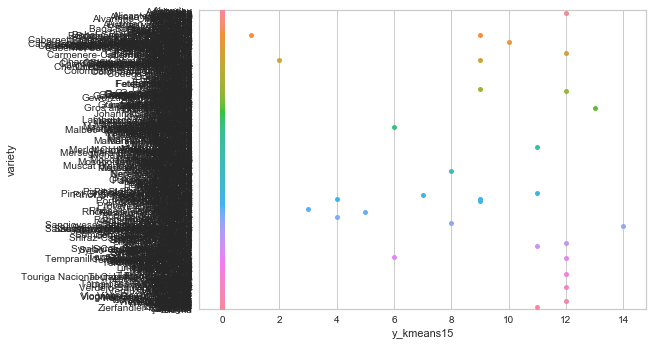

In [475]:
sns.swarmplot(new_people_wine.y_kmeans15,new_people_wine.variety)

# Now running the same analysis using Silhouette measures

In [476]:
# Silhouette number ranges from -1 to 1 
# where -1 means the point may have been assigned to wrong cluster
# and +1 indicates the separation is perfect

In [481]:
# first to determine the groupings for individuals
# that is how similar two individuals are based on their wine preferences

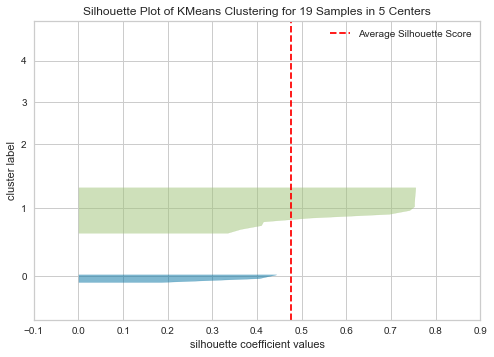

In [486]:
# initalize the model with 5 clusters
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_wine)
visualizer.show()

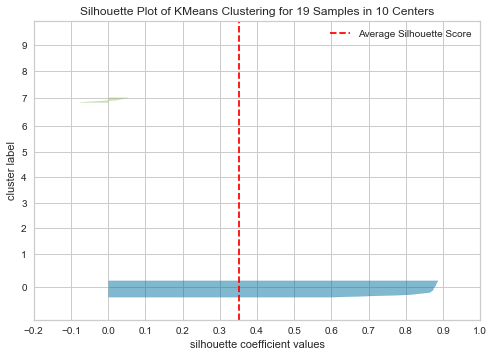

In [487]:
# initalize the model with 10 clusters
model = KMeans(n_clusters=10)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_wine)
visualizer.show()

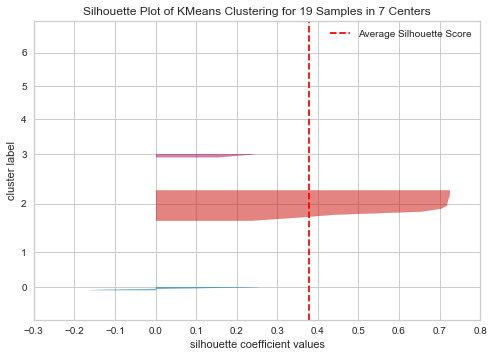

In [488]:
# initalize the model with 7 clusters
model = KMeans(n_clusters=7)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_wine)
visualizer.show()

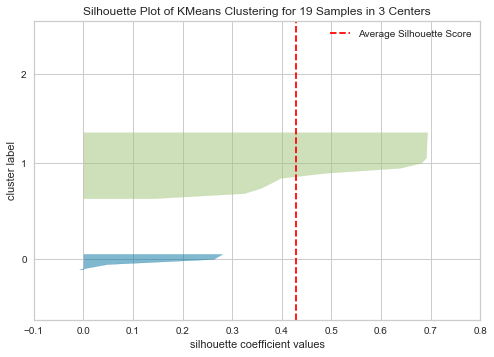

In [489]:
# initalize the model with 3 clusters
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_wine)
visualizer.show()

In [490]:
# best one is with 5 clusters

In [493]:
# now we will cluster wines based on their preference for buying 

In [496]:
new_people.iloc[:,1:]

,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone,y_kmeans15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,0
2,1,0,0,0,0,0,0,5,0,178,0,3,0,0,0,0,0,0,6,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0,0,0,0,0,0,0,434,3,0,0,175,0,0,151,0,17,0,800,11
666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
667,0,2,130,0,0,0,1,0,0,0,0,0,0,0,2,71,3,0,0,0
668,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


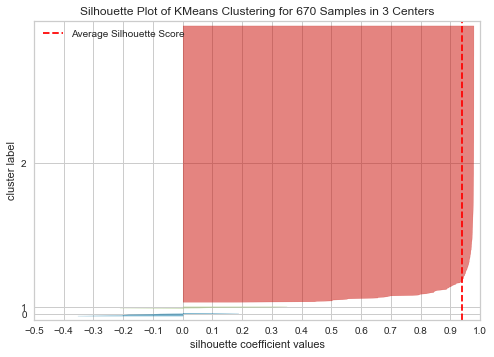

In [497]:
# initalize the model with 3 clusters
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_people.iloc[:,1:])
visualizer.show()

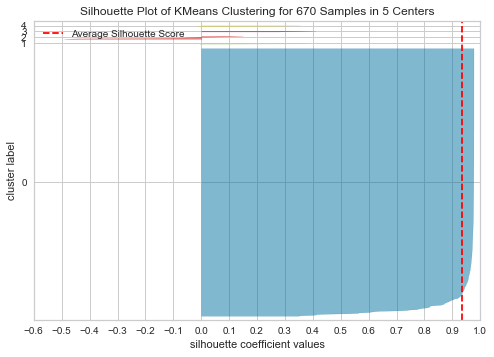

In [498]:
# initalize the model with 5 clusters
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_people.iloc[:,1:])
visualizer.show()

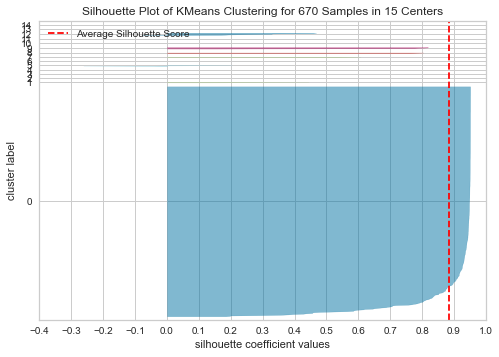

In [499]:
# initalize the model with 15 clusters
model = KMeans(n_clusters=15)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(new_people.iloc[:,1:])
visualizer.show()

In [500]:
# believe the initial cluster with 3 as hyper parameter was good enough